In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv('sales_revenue.csv')
df

,Advertising_Budget,Sales_Revenue
0,0.000000,40.630146
1,0.400802,63.376922
2,0.801603,51.703441
3,1.202405,44.493259
4,1.603206,69.764205
...,...,...
495,198.396794,-322.261881
496,198.797595,-361.553958
497,199.198397,-395.647217
498,199.599198,-365.121615


In [5]:
x=df[['Advertising_Budget']]
y=df['Sales_Revenue']

In [6]:
poly_feature=PolynomialFeatures(degree=2)
x_feature=poly_feature.fit_transform(x)
x_feature

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00801603e-01, 1.60641925e-01],
       [1.00000000e+00, 8.01603206e-01, 6.42567701e-01],
       ...,
       [1.00000000e+00, 1.99198397e+02, 3.96800013e+04],
       [1.00000000e+00, 1.99599198e+02, 3.98398400e+04],
       [1.00000000e+00, 2.00000000e+02, 4.00000000e+04]], shape=(500, 3))

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred=model.predict(x_test)
y_pred

array([ 159.59966083,  240.73689562,  124.4095392 ,  353.73691137,
        296.19478774,   64.95316327,  115.9019981 ,  323.75576719,
        230.34178505, -135.81597308,   77.25563465,  369.45907129,
         26.1853873 ,  262.18807826,  132.77205138,   83.4668777 ,
       -333.76811851,  138.17354117,  260.38242609,   19.49849076,
       -310.16200318, -314.85099759,  317.51395234,  172.40917836,
        246.78059006, -181.19089651, -343.32336492,  368.64190176,
        291.5046966 ,  223.98510097, -241.76080594,  219.61866724,
        -96.25804682,  364.03890031,   55.37046195,  226.14414635,
         16.13087099,  234.54817226,  368.97975423,  219.54381636,
         95.48706749,  278.28875661, -286.95874597,  368.00631443,
        146.29598355,  248.76292622,   48.97252654,   83.36351221,
         -4.4132484 ,  115.80466454,  238.69010216,  367.23200429,
        331.87930628,   12.74713691,  369.36211117,  201.42912155,
        348.32057889,  104.23348243,  369.54238471,  250.72914

In [ ]:
msc=mean_squared_error(y_pred,y_test)
print(f"mean_squared_error:{msc}")
rmsc=np.sqrt(msc)
print(f"root_mean_squared_error:{rmsc}")
score=r2_score(y_pred,y_test)
print(f"score:{score}")

mean_squared_error:1022.9581916759607
root_mean_squared_error:31.983717602492064
score:0.9742849123397025


In [11]:
m=model.predict(poly_feature.transform(x))

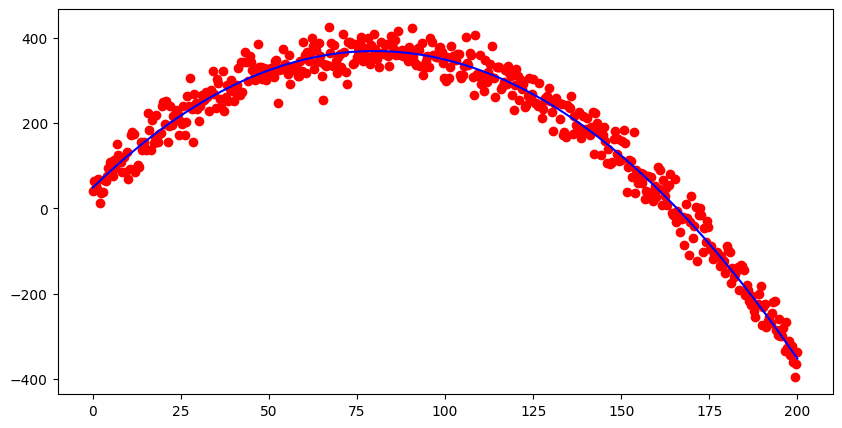

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c="r")
plt.plot(x,m,c="b")
plt.show()

In [15]:
new_data=np.array([[198.797599]])
poly=poly_feature.transform(new_data)
predict=model.predict(poly)
predict

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-338.53772996])

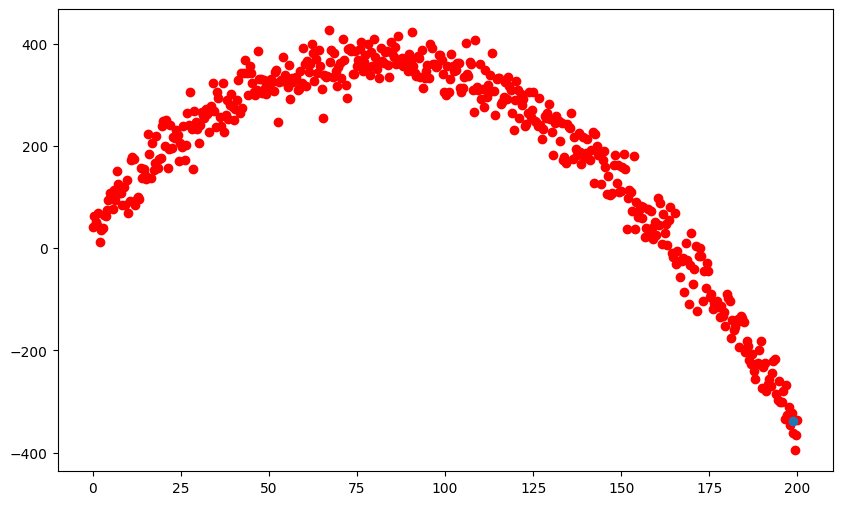

In [16]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(new_data,predict)
plt.show()